In [1]:
%cd D:\Projects\github\X_Ray_Classification

D:\Projects\github\X_Ray_Classification


In [2]:
import pandas as pd
from PIL import Image

In [3]:
data_map = pd.read_csv(r"D:\Projects\github\X_Ray_Classification\data\chest_xray\chest_xray\data_map.csv")
data_map.head()

,Image,Class,Split,resized
0,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0115-0001.jpeg
1,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0117-0001.jpeg
2,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0119-0001.jpeg
3,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0122-0001.jpeg
4,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0125-0001.jpeg


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
lbl_encoder = LabelEncoder()
data_map["clas_enc"] = lbl_encoder.fit_transform(data_map["Class"])

In [6]:
data_map

,Image,Class,Split,resized,clas_enc
0,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0115-0001.jpeg,0
1,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0117-0001.jpeg,0
2,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0119-0001.jpeg,0
3,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0122-0001.jpeg,0
4,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0125-0001.jpeg,0
...,...,...,...,...,...
5851,D:\Projects\Github\X_Ray_Classification\data\c...,PNEUMONIA,val,data/resized/val_PNEUMONIA_person1949_bacteria...,1
5852,D:\Projects\Github\X_Ray_Classification\data\c...,PNEUMONIA,val,data/resized/val_PNEUMONIA_person1950_bacteria...,1
5853,D:\Projects\Github\X_Ray_Classification\data\c...,PNEUMONIA,val,data/resized/val_PNEUMONIA_person1951_bacteria...,1
5854,D:\Projects\Github\X_Ray_Classification\data\c...,PNEUMONIA,val,data/resized/val_PNEUMONIA_person1952_bacteria...,1


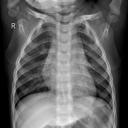

In [7]:
i = data_map['resized'][1]
Image.open(i)

In [8]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

In [9]:
class XrayDataset(Dataset):

    def __init__(self, df_split, transform):

        self.df_split = df_split
        self.transform = transform

    def __len__(self):
        return len(self.df_split)
    
    def __getitem__(self, index):
        
        img_path = self.df_split.iloc[index]["resized"]

        clas = self.df_split.iloc[index]["clas_enc"]

        img = Image.open(img_path).convert("L") #converting to grayscale

        img_trans = self.transform(img)

        return img_trans, clas


In [10]:
train_dataset = XrayDataset(data_map[data_map['Split'] == 'train'], transform=transforms.ToTensor())
val_dataset = XrayDataset(data_map[data_map['Split'] == 'val'], transform=transforms.ToTensor())
test_dataset = XrayDataset(data_map[data_map['Split'] == 'test'], transform=transforms.ToTensor())

In [11]:
train_dataset[10]

(tensor([[[0.4314, 0.4118, 0.4902,  ..., 0.0510, 0.0549, 0.0588],
          [0.3765, 0.4706, 0.4314,  ..., 0.1059, 0.1137, 0.1176],
          [0.3882, 0.4784, 0.4235,  ..., 0.1843, 0.1922, 0.2000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]]),
 np.int64(0))

In [12]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [13]:
model = models.resnet50(weights = models.ResNet50_Weights.IMAGENET1K_V2)

In [14]:
 models.resnet50(weights = models.ResNet50_Weights.IMAGENET1K_V2)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
num_ftrs

NameError: name 'num_ftrs' is not defined

In [17]:
model.conv1 = nn.Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(3, 3), bias=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(in_features=num_ftrs, out_features=2, bias=True)


In [18]:
device = torch.device("cuda")

In [19]:
device

device(type='cuda')

In [20]:
import torch
print(torch.version.cuda)  # Should show 12.8 or your installed version
print(torch.cuda.is_available())  # Should return True if CUDA is available


12.8
True


In [21]:
# Ensure that model and model2 are properly moved to the device without redefinition
model = model.to(device)

In [22]:
from tqdm import tqdm

In [23]:
import torch
from tqdm import tqdm
import os

class Trainer:
    def __init__(self, model, criterion, optimizer, device, early_stopping, 
                 model_save_path="models/best_model4.pth", epoch_weights_dir="weights",
                 test_loader=None):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.device = device
        self.early_stopping = early_stopping
        self.model_save_path = model_save_path
        self.epoch_weights_dir = epoch_weights_dir
        self.test_loader = test_loader

        self.train_losses = []
        self.val_losses = []
        self.test_losses = []
        self.train_accs = []
        self.val_accs = []
        self.test_accs = []

        os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
        os.makedirs(epoch_weights_dir, exist_ok=True)
        

    def train_epoch(self, train_loader, epoch_desc="Training"):
        self.model.train()
        running_loss, correct, total = 0.0, 0, 0
        pbar = tqdm(train_loader, desc=epoch_desc)

        for images, labels in pbar:
            images, labels = images.to(self.device), labels.to(self.device)
            self.optimizer.zero_grad()
            outputs = self.model(images)
            loss_value = self.criterion(outputs, labels)
            loss_value.backward()
            self.optimizer.step()

            running_loss += loss_value.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            pbar.set_postfix({'loss': running_loss / (pbar.n + 1), 'acc': correct / total})

        return running_loss / len(train_loader), correct / total

    def validate_epoch(self, val_loader):
        self.model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc="Validation"):
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = self.model(images)
                loss_value = self.criterion(outputs, labels)
                val_loss += loss_value.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        return val_loss / len(val_loader), correct / total

    def test_epoch(self, test_loader):
        self.model.eval()
        test_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in tqdm(test_loader, desc="Testing"):
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = self.model(images)
                loss_value = self.criterion(outputs, labels)
                test_loss += loss_value.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        return test_loss / len(test_loader), correct / total

    def run_training(self, train_loader, val_loader, num_epochs=30):
        best_val_acc = 0.0  # Track best accuracy

        for epoch in range(num_epochs):
            torch.cuda.empty_cache()
            print(f"\n=== Epoch [{epoch+1}/{num_epochs}] ===")

            train_loss, train_acc = self.train_epoch(train_loader, epoch_desc=f"Epoch {epoch+1}")
            val_loss, val_acc = self.validate_epoch(val_loader)

            self.train_losses.append(train_loss)
            self.train_accs.append(train_acc)
            self.val_losses.append(val_loss)
            self.val_accs.append(val_acc)

            print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")
            print(f"Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

            if self.test_loader:
                test_loss, test_acc = self.test_epoch(self.test_loader)
                self.test_losses.append(test_loss)
                self.test_accs.append(test_acc)
                print(f"Test Loss: {test_loss:.4f}, Accuracy: {test_acc:.4f}")

            # Save current epoch weights
            torch.save(self.model.state_dict(), os.path.join(self.epoch_weights_dir, f"epoch_{epoch+1}_weights.pth"))

            # Save best model based on validation accuracy
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                print(f"Validation accuracy improved to {val_acc:.4f}. Saving best model.")
                torch.save(self.model.state_dict(), self.model_save_path)

            # Early stopping based on validation loss
            if self.early_stopping(val_acc):
                print("Early stopping triggered.")
                break

    def evaluate_model(self, data_loader):
        return self.test_epoch(data_loader)


In [24]:
import torch.nn as nn
#early_stopping
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()
early_stopping = EarlyStopping(patience=7, verbose=True)

trainer = Trainer(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    early_stopping=early_stopping,
    model_save_path="models/best_model4.pth",
    epoch_weights_dir="weights",
    test_loader=test_loader  # Include test loader if you want test each epoch
)

trainer.run_training(train_loader, val_loader, num_epochs=30)


NameError: name 'EarlyStopping' is not defined

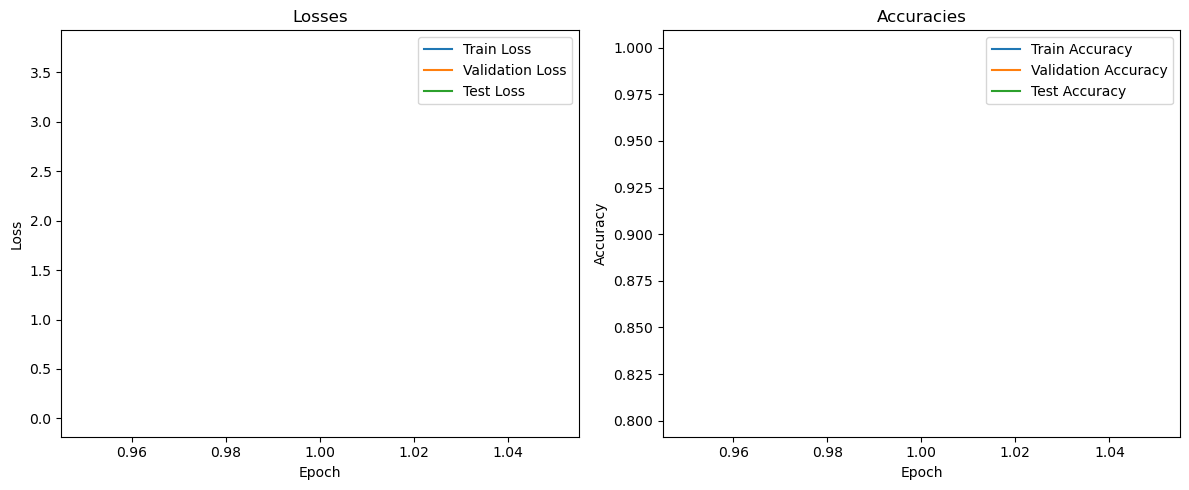

In [65]:
import matplotlib.pyplot as plt

epochs = range(1, len(trainer.train_losses) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, trainer.train_losses, label='Train Loss')
plt.plot(epochs, trainer.val_losses, label='Validation Loss')
if trainer.test_losses:
    plt.plot(epochs, trainer.test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Losses')

plt.subplot(1, 2, 2)
plt.plot(epochs, trainer.train_accs, label='Train Accuracy')
plt.plot(epochs, trainer.val_accs, label='Validation Accuracy')
if trainer.test_accs:
    plt.plot(epochs, trainer.test_accs, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracies')

plt.tight_layout()
plt.show()


In [68]:
import os
import torch
import torch.nn as nn
from torchvision import models

def evaluate_all_models(model_dir, test_loader, device, trainer):
    model_files = [f for f in os.listdir(model_dir) if f.endswith('.pth')]
    accuracies = {}

    for model_file in model_files:
        model_path = os.path.join(model_dir, model_file)
        print(f"Evaluating {model_file}...")

        # Create a fresh resnet50 model
        model = models.resnet50(weights=None)

        # Modify the first conv layer to accept 1 channel (grayscale images)
        model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

        # Modify the last fully connected layer for binary classification
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(in_features=num_ftrs, out_features=2, bias=True)

        # Load the model weights
        model.load_state_dict(torch.load(model_path, map_location=device))
        model.to(device)

        # Evaluate the model
        test_loss, test_acc = trainer.evaluate_model(model, test_loader)
        accuracies[model_file] = test_acc
        print(f"Test Accuracy: {test_acc:.4f}")

    return accuracies


Epoch 6 has the best weights with:  Validation Loss: 0.0159, Validation Accuracy: 1.0000 ,Train Loss: 0.0169, Train Accuracy: 0.9931



In [23]:
import pickle

with open("data/lbl_enoder.pkl", "wb") as f:
    pickle.dump(lbl_encoder, f)

In [24]:
data_map.head()

,Image,Class,Split,resized,clas_enc
0,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0115-0001.jpeg,0
1,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0117-0001.jpeg,0
2,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0119-0001.jpeg,0
3,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0122-0001.jpeg,0
4,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0125-0001.jpeg,0


In [25]:
data_map['Split'].unique()

array(['train', 'test', 'val'], dtype=object)

In [26]:
data_map['clas_enc'].unique()

array([0, 1])

In [27]:
data_map['clas_enc'].value_counts()

clas_enc
1    4273
0    1583
Name: count, dtype: int64

In [71]:
model = r"D:\Projects\github\X_Ray_Classification\models\best_model2.pth"

In [ ]:
import torch
from torchvision import models, transforms
from torch import nn
from PIL import Image

# Load label encoder
import pickle
with open("D:\Projects\github\X_Ray_Classification\data\lbl_encoder.pkl", "rb") as f:
    lbl_encoder = pickle.load(f)

# Load the model architecture
model = models.resnet50(weights=None)  # no weights because we will load ours
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

# Load saved weights
model.load_state_dict(torch.load(r"D:\Projects\github\X_Ray_Classification\models\best_model.pth", map_location="cuda"))
model.eval()
model.to("cuda")  # or "cpu" if you're not using GPU

# Preprocess the image
img_path = r"D:\Projects\github\X_Ray_Classification\data\chest_xray\chest_xray\resized\train_PNEUMONIA_person529_bacteria_2229.jpeg"
img = Image.open(img_path).convert("L")  # convert to grayscale
img_tensor = transforms.ToTensor()(img).unsqueeze(0).to("cuda")  # add batch dimension

# Run prediction
with torch.no_grad():
    outputs = model(img_tensor)
    predicted_class = torch.argmax(outputs, dim=1).item()

# Decode label
predicted_label = lbl_encoder.inverse_transform([predicted_class])[0]
print(f"Predicted class: {predicted_label}")


Predicted class: PNEUMONIA


In [31]:
import torch
from torchvision import models
from torch import nn

def evaluate_model_on_test(model_path, test_loader, device="cuda"):
    # Recreate the same model architecture
    model = models.resnet50(weights=None)
    model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 2)

    # Load the saved weights
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()

    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")
    return accuracy


In [40]:
def infer(img_path):
    # Load the model architecture   
    model = models.resnet50(weights=None)
    model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 2)
    model.load_state_dict(torch.load(r"D:\Projects\github\X_Ray_Classification\models\best_model.pth", map_location="cuda"))
    model.eval()
    model.to("cuda")  # or "cpu" if you're not using GPU
    img = Image.open(img_path).convert("L")  # convert to grayscale
    img = transforms.ToTensor()(img).unsqueeze(0).to("cuda")
    with torch.no_grad():
        output = model(img)
        argmax = torch.argmax(output, dim=1).item()
        predicted_class = lbl_encoder.inverse_transform([argmax])[0]
    return predicted_class

In [41]:
infer(r"D:\Projects\github\X_Ray_Classification\data\chest_xray\chest_xray\resized\train_PNEUMONIA_person529_bacteria_2229.jpeg")

'PNEUMONIA'

In [32]:
print("best_model2",evaluate_model_on_test(r"D:\Projects\github\X_Ray_Classification\models\best_model2.pth", test_loader, device="cuda"))
print("---------------------------------------")
print("best_model",evaluate_model_on_test(r"D:\Projects\github\X_Ray_Classification\models\best_model.pth", test_loader, device="cuda"))
print("---------------------------------------")
print("best_model3",evaluate_model_on_test(r"D:\Projects\github\X_Ray_Classification\models\best_model3.pth", test_loader, device="cuda"))
print("---------------------------------------")
print("best_model4",evaluate_model_on_test(r"D:\Projects\github\X_Ray_Classification\models\best_model4.pth", test_loader, device="cuda"))
print("---------------------------------------")
print("best_model_resnet50_model",evaluate_model_on_test(r"D:\Projects\github\X_Ray_Classification\models\best_resnet50_model.pth", test_loader, device="cuda"))

Test Accuracy: 0.8413
best_model2 0.8413461538461539
---------------------------------------
Test Accuracy: 0.8429
best_model 0.842948717948718
---------------------------------------
Test Accuracy: 0.8125
best_model3 0.8125
---------------------------------------
Test Accuracy: 0.8013
best_model4 0.8012820512820513
---------------------------------------
Test Accuracy: 0.7644
best_model_resnet50_model 0.7644230769230769


In [72]:
img_path = r"D:\Projects\github\X_Ray_Classification\data\chest_xray\chest_xray\resized\train_PNEUMONIA_person529_bacteria_2229.jpeg" 
img = Image.open(img_path).convert("L")
img_trans =  transforms.ToTensor()(img).unsqueeze(0).to(device)
preds = model(img_trans)
class_indx = torch.argmax(preds).item()
class_indx
lbl_encoder.inverse_transform([class_indx])[0]
#img_trans = transforms.Compose([transforms.Resize((128,128)), transforms.ToTensor()]).to


TypeError: 'str' object is not callable

In [29]:
lbl_encoder = LabelEncoder()
data_map["clas_enc"] = lbl_encoder.fit_transform(data_map["Class"])

In [30]:
import torch
from PIL import Image
from torchvision import transforms
import pickle
import os

# Load the label encoder
with open("D:\Projects\github\X_Ray_Classification\data\lbl_encoder.pkl", "rb") as f:
    lbl_encoder = pickle.load(f)

# Define the inference function
def predict_xray_class(model, image_path, device, label_encoder):
    """
    Predicts the class of a single X-ray image.

    Args:
        model: The trained PyTorch model.
        image_path (str): The path to the input image.
        device (torch.device): The device to use for inference (e.g., 'cuda' or 'cpu').
        label_encoder: The fitted LabelEncoder object.

    Returns:
        tuple: A tuple containing the predicted class name and the prediction probabilities.
    """
    model.eval() # Set the model to evaluation mode

    # Define the image transformation (should match the training transformation)
    transform = transforms.Compose([
        transforms.ToTensor(),
        # Add any other necessary transformations (e.g., resizing if not already done)
    ])

    # Load and preprocess the image
    img = Image.open(image_path).convert("L") # Convert to grayscale
    img_tensor = transform(img).unsqueeze(0) # Add batch dimension

    # Move the image tensor to the device
    img_tensor = img_tensor.to(device)

    # Perform inference
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = torch.softmax(outputs, dim=1)
        _, predicted_class_index = torch.max(outputs, 1)

    # Get the predicted class name
    predicted_class_name = label_encoder.inverse_transform(predicted_class_index.cpu())[0]

    return predicted_class_name, probabilities.cpu().numpy()[0]

# --- Example Usage ---
# Assuming 'model' is your trained model loaded with the best weights
# Assuming 'device' is defined (e.g., torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# Load the model weights from epoch 6
epoch_6_weights_path = "D:\Projects\github\X_Ray_Classification\weights\epoch_6_weights.pth"
print(f"Loading model weights from {epoch_6_weights_path}")
model.load_state_dict(torch.load(epoch_6_weights_path)) # Using 'model'
model.to(device) # Ensure the loaded model is on the correct device


# Get an example image path from the test set
# Note: data_map needs to be defined in a previous cell for this to work
example_image_path = data_map[data_map['Split'] == 'test'].iloc[3]['resized']
actual_class = data_map[data_map['Split'] == 'test'].iloc[3]['Class']

print(f"Example image path: {example_image_path}")
print(f"Actual class: {actual_class}")

# Perform prediction
predicted_class, probabilities = predict_xray_class(model, example_image_path, device, lbl_encoder)

print(f"Predicted class: {predicted_class}")
print(f"Prediction probabilities: {probabilities}")

# You can repeat this for other images in the test set to evaluate the model



Loading model weights from D:\Projects\github\X_Ray_Classification\weights\epoch_6_weights.pth
Example image path: data/resized/test_NORMAL_IM-0006-0001.jpeg
Actual class: NORMAL
Predicted class: PNEUMONIA
Prediction probabilities: [0.14258128 0.8574188 ]


In [33]:
model.eval()
with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        if i == 0:
            correct = 0
            total = 0
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))


Accuracy of the network on the 10000 test images: 78 %


In [58]:
data_map[data_map['Split'] == 'test'].iloc[7]['resized']

'data/resized/test_NORMAL_IM-0011-0001-0001.jpeg'

In [52]:
# Suppose your DataFrame has a column 'Class' with string labels
class_names = data_map['Class']  # Replace with your actual column name
lbl_encoder = LabelEncoder()
lbl_encoder.fit(class_names)

# Save the LabelEncoder to a file
with open("data/lbl_encoder.pkl", "wb") as f:
    pickle.dump(lbl_encoder, f)

In [53]:
data_map.head()

,Image,Class,Split,resized,clas_enc
0,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0115-0001.jpeg,0
1,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0117-0001.jpeg,0
2,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0119-0001.jpeg,0
3,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0122-0001.jpeg,0
4,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0125-0001.jpeg,0
